# Домашная работа 3. Визуальный анализ.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература

- [Галерея графиков Matplotlib](https://matplotlib.org/gallery/index.html)
- [Галерея графиков Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Открытый курс машинного обучения. Тема 2: Визуализация данных c Python](https://habr.com/company/ods/blog/323210/)

In [276]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import gzip
import requests,zipfile,io #работает с архивами
%matplotlib inline

## Визуальный анализ данных

В этом задании вам предлагается провести визуальный анализ датасета о прокатах велосипедов https://www.kaggle.com/c/bike-sharing-demand/data. Оригинальная задача предполагает построение модели предсказания количества прокатов в городе в зависимости от погоды.

Для каждого дня проката известны следующие признаки (как они были указаны в источнике данных):
- season: 1 - весна, 2 - лето, 3 - осень, 4 - зима
- yr: 0 - 2011, 1 - 2012
- mnth: от 1 до 12
- holiday: 0 - нет праздника, 1 - есть праздник
- weekday: от 0 до 6
- workingday: 0 - нерабочий день, 1 - рабочий день
- weathersit: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
- temp: температура в Цельсиях
- atemp: температура по ощущениям в Цельсиях
- hum: влажность
- windspeed(mph): скорость ветра в милях в час
- windspeed(ms): скорость ветра в метрах в секунду
- cnt: количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

Загрузите с помощью pandas файл `bikes_rent.csv.gz` и выведите первые 5 строк. Ознакомьтесь с данными с помощью функций describe и info.

In [277]:
df = pd.read_csv('../dataframes/bikes_rents.csv')
print(df.head())
print(df.describe())


   season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed(mph)  windspeed(ms)   cnt  
0  18.18125  80.5833       10.749882       4.805490   985  
1  17.68695  69.6087       16.652113       7.443949   801  
2   9.47025  43.7273       16.636703       7.437060  1349  
3  10.60610  59.0435       10.739832       4.800998  1562  
4  11.46350  43.6957       12.522300       5.597810  1600  
           season          yr        mnth     holiday     weekday  workingday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     2.496580    

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          731 non-null    int64  
 1   yr              731 non-null    int64  
 2   mnth            731 non-null    int64  
 3   holiday         731 non-null    int64  
 4   weekday         731 non-null    int64  
 5   workingday      731 non-null    int64  
 6   weathersit      731 non-null    int64  
 7   temp            731 non-null    float64
 8   atemp           731 non-null    float64
 9   hum             731 non-null    float64
 10  windspeed(mph)  731 non-null    float64
 11  windspeed(ms)   731 non-null    float64
 12  cnt             731 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 74.4 KB


Давайте посмотрим на графиках, как целевой признак зависит количество прокатов (cnt) зависит от остальных признаков `df.columns[:-1]`.

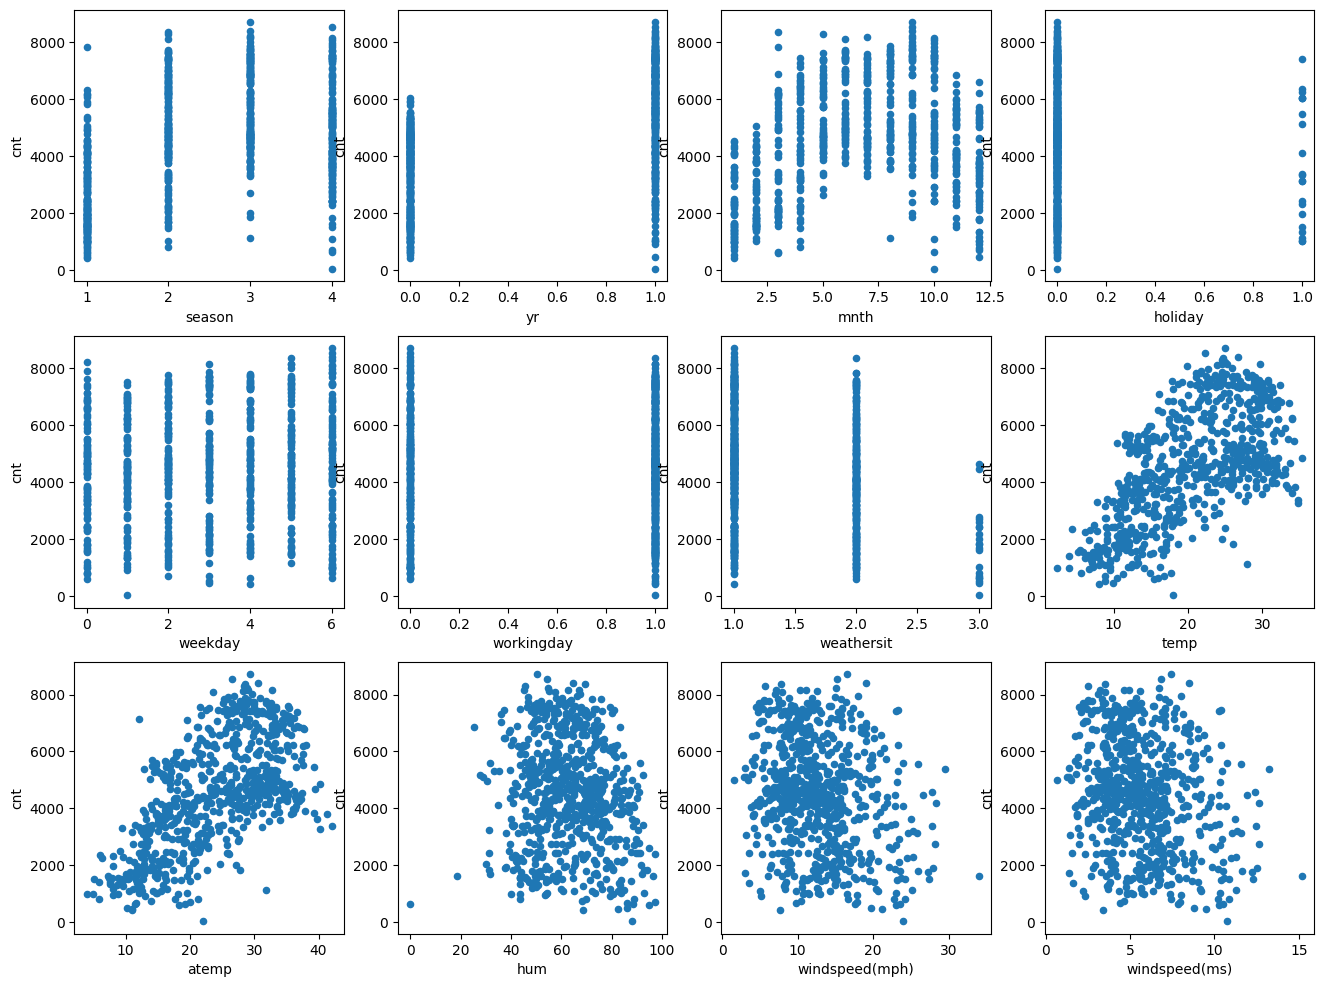

In [279]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
for idx, feature in enumerate(df.columns[:-1]):
     df.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

## 1. Ответьте на вопросы:

#### Каков характер зависимости числа прокатов от месяца?

ответ: Чем ближе к лету, тем больше количетсво людей садятся на велосипеды

#### Укажите один или два признака, от которых число прокатов скорее всего зависит линейно
_(чем больше значение, тем больше прокатов или наоборот, например)_

Можете проверить результат с помощью lnplot.

ответ: От atemp и от temp 

## 2. Корреляционная матрица 

Напомним, что корреляция отражает взаимосвязь двух случайных величин. Она бывает положительная и отрицательная. Чем ближе коэффициент корреляции к нулю, тем меньше взаимосвязь. Чем больше абсолютная корреляци, тем взаимосвязь больше.

Постройте heatmap корреляционной матрицы. Матрица формируется средствами pandas, со стандартным значением параметров.

**Ответьте на вопрос**: с какими признаками количество прокатов коррелирует меньше всего (около 4 штуки). А с какими больше всего?

Ответ: Меньше всего коррелирует с hum, holiday, weekday и workingday. Лучше всего коррелирует с температурой (temp и atemp), с yr и, немного поменьше, но также неплохо, с season

<Axes: >

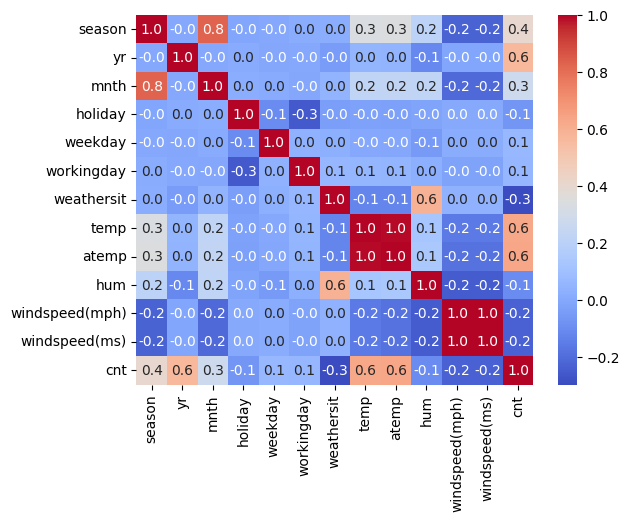

In [280]:
cor = df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(cor, annot=True, fmt='.1f', cmap='coolwarm')



## 3. Barpot 

Постройте Bar-график суммарного количества прокатов велосипедов по месяцам за каждый год одновременно. (будет 24 столбика)

**Ответьте на вопрос:** почему в предыдущем графике была такая большая корреляция между количеством прокатов и годом?

Ответ: Потому что, по графику видно, что с первого месяца 2012 года берут на прокат гораздо охотнее, чем в 2011 году. Это не связанно с погодой или с месяцем, которые также хорошо коррелируются с cnt

<Axes: xlabel='mnth', ylabel='cnt'>

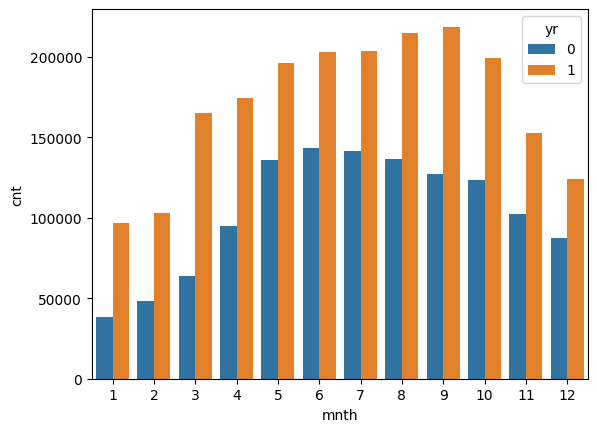

In [281]:
year = df.groupby(['yr', 'mnth'])['cnt'].sum()
year = year.reset_index() 
sns.barplot(x="mnth", y="cnt", hue="yr", data=year)

#sns.barplot(x="mnth", y="atemp", hue="yr", data=df)









## 4. Countplot 

Постройте countplot диаграммы для признаков `weekday`, `weathersit`, 

**Ответьте на вопрос:** что вы можете сказать о том, как формировался этот датасет.

**Ответьте на вопрос:** как называется распределение значений признака `weekday`?

Ответ: Датасет по weathersit обычное значение равняется 1, что означает хорошую погоду. Значения 4 нет, значит не было очень плохой погоды.
    
Ответ: Атрибутивный

,weathersit,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,463,463,463,463,463,463,463,463,463,463,463,463
1,2,247,247,247,247,247,247,247,247,247,247,247,247
2,3,21,21,21,21,21,21,21,21,21,21,21,21


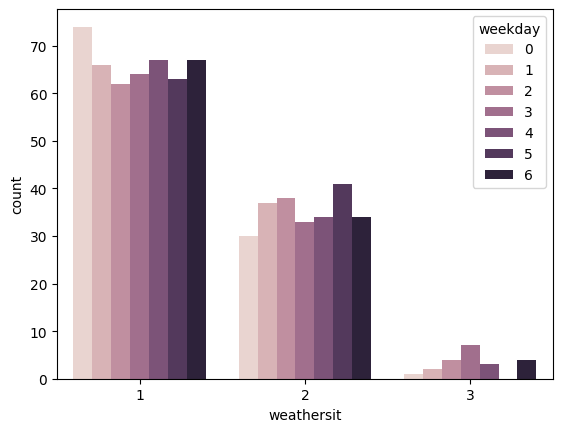

In [282]:
sns.countplot(data=df, x= 'weathersit', hue='weekday')
count = df.groupby('weathersit').count()
count = count.reset_index()
count

## 5. Распределение 

Постройте распределение целевого признака.

**Ответьте на вопрос:** основываясь на графике, сколько приблизительно в среднем прокатов бывает в день?

**Ответьте на вопрос:** Как называется полученное распределение?.

Ответ: Чуть меньше 5000

Ответ: Нормальное распределение

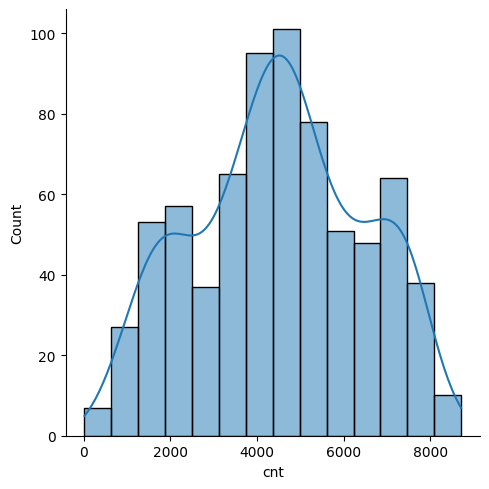

In [283]:
sns.displot(df['cnt'], kde=True)

## 6. Совместное распределение признаков 

Постройте график совместного распределения признаков температура и ощущение температуры.

**Ответьте на вопрос:** вас в этом графике ничего не настораживает? Почему?

Ответ: То что 12 градусов ощущается холоднее, чем обычно можно объяснить либо частыми ветрами в эту погоду, либо то, что велосепедисты на скорости быстрее замерзают, из-за чего кажется, что холоднее, чем есть на самом деле

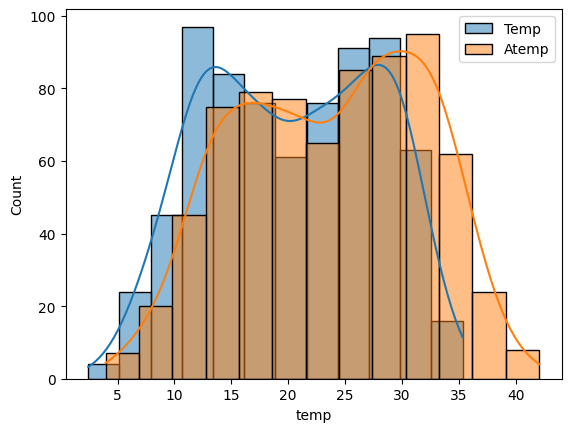

In [284]:
fig, ax = plt.subplots(1,1)
temp = sns.histplot(df['temp'],kde=True,ax=ax, label='Temp')
atemp = sns.histplot(df['atemp'],kde=True, ax=ax,label='Atemp')
plt.legend()
plt.show()

## 7. Ящик с усами 

Нарисуйте сами для распределения количества прокатов велосипедов по месяцам в зависимости от того рабочий это день или нет.

**Ответьте на вопрос:** почему в некоторых месяцах чаще берут велосипеды в будний день, а в некоторые - в выходной.


Ответ: Есть 4 версии: 1. Погодные условия, 2. Рабочий график, 3. Туристический сезон, 4. Мероприятия и праздники

<Axes: xlabel='mnth', ylabel='cnt'>

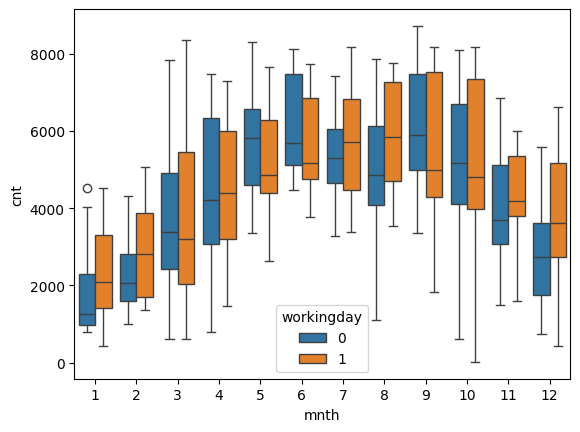

In [285]:
sns.boxplot(x='mnth', y='cnt', hue='workingday', data=df)

## 8. Хитрый вопрос 

Правда ли, что при более сильном ветре человеку ощущается, что на улице холодне, чем на самом деле? Нарисуйте график, подтверждающий или опровергающий эту гипотезу. Обоснуйте. Возможно, вам придется создать новый признак.

Рассуждение: Я сделал новый признак, кто вычитается формальная температура по Цельсию и та температура, которая ощущается, по двум графикам видно, что ветер влияет на увеличение разницы temp от atemp. Также я сделал корреляцию, где хорошо видно, что скорость ветра так же влияет на эту разницу.

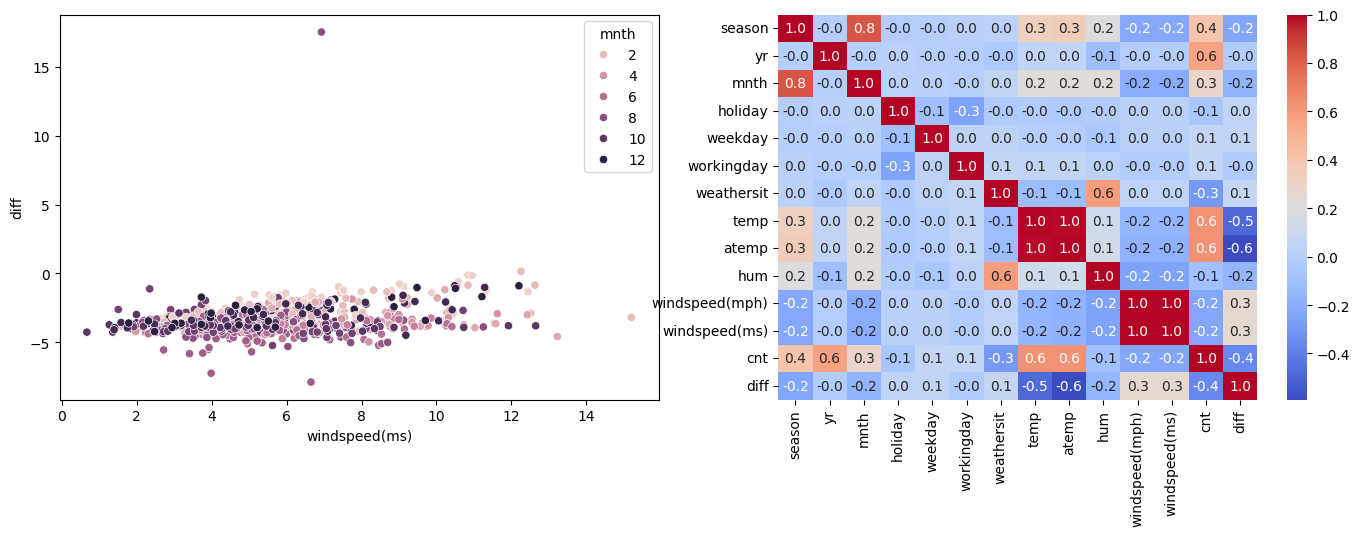

In [311]:
df['diff'] = df['temp'] - df['atemp']
fig, ax = plt.subplots(1,2, figsize=(17,5))
scatter = sns.scatterplot(x='windspeed(ms)', y ='diff',hue='mnth',data=df, color='red',ax=ax[0])
corelation = sns.heatmap(cor, annot=True, fmt='.1f', cmap='coolwarm',ax=ax[1])
plt.show()


